# Notebook II project

## Description de este experimento

### Cambio lineal de tasas de aprendizaje (1e-5 hasta 1e-4) usando como optimizador RMSPropOptimizer

En primer lugar se evalua con mammo y dcgan. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mammo = np.load('results/mammo/mammo.npz')['loss']
dcgan = np.load('results/dcgan/dcgan.npz')['loss']

In [3]:
learning =  np.linspace(1e-5,1e-4,10)

In [41]:
def toplot(data,learning,title,sel):
    fig = plt.figure(figsize = (10,5))
    for c,i in enumerate(data):
        plt.plot(i[sel,:,0],i[sel,:,1],label= learning[c])
    #add mean
    plt.plot(data[0,sel,:,0],np.mean(data[:,sel,:,1],axis=0), "-.",
             linewidth = 4,color = "grey")
    
    x = plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.title(title)
    

<IPython.core.display.Javascript object>


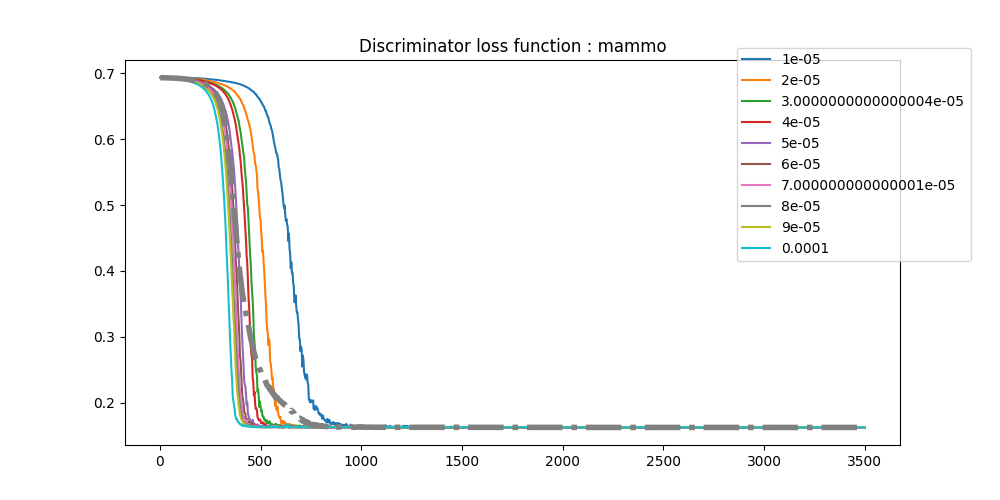

<IPython.core.display.Javascript object>


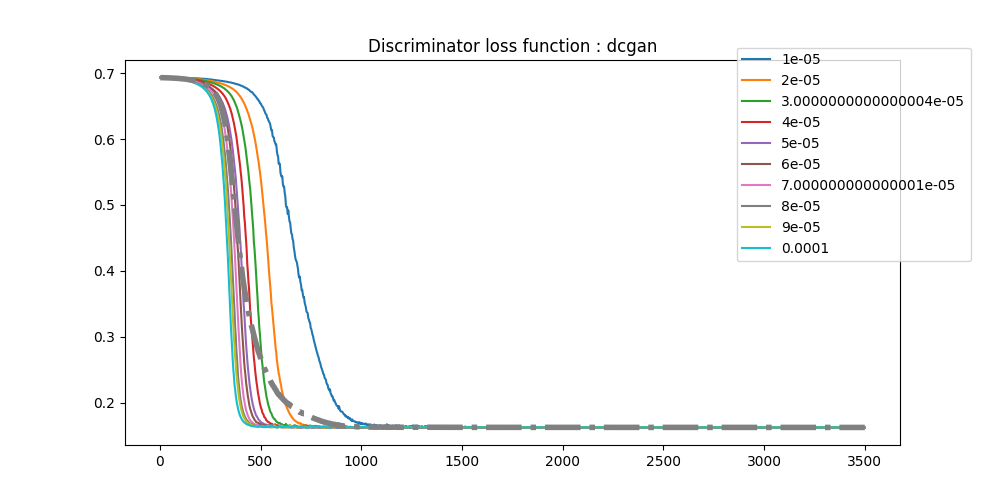

In [16]:
toplot(mammo,learning,"Discriminator loss function : mammo",0)
toplot(dcgan,learning,"Discriminator loss function : dcgan",0)

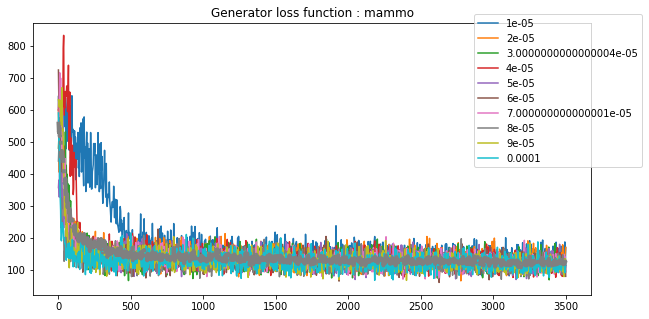

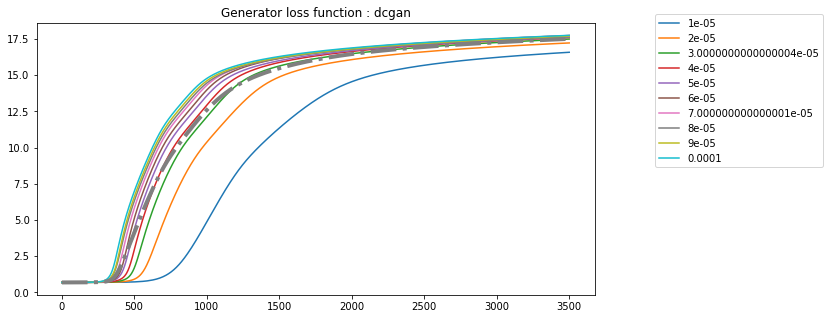

In [42]:
toplot(mammo,learning,"Generator loss function : mammo",1)
toplot(dcgan,learning,"Generator loss function : dcgan",1)

In [14]:
data = np.mean(dcgan[:,1,:,1],axis=0)

# Exp no 2

In [3]:
lsgan = np.load('results/lsgan/lsgan.npz')['loss']
wgan = np.load('results/wgan/wgan.npz')['loss']
learning =  np.linspace(1e-5,1e-4,10)

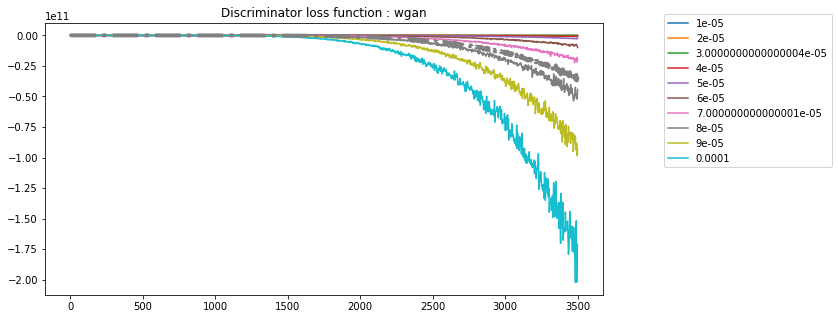

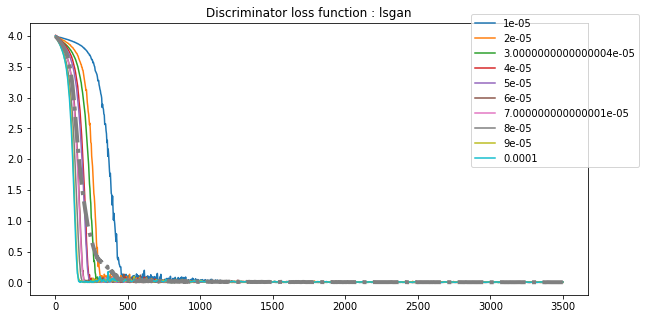

In [8]:
toplot(wgan,learning,"Discriminator loss function : wgan",0)
toplot(lsgan,learning,"Discriminator loss function : lsgan",0)

In [6]:
%matplotlib notebook

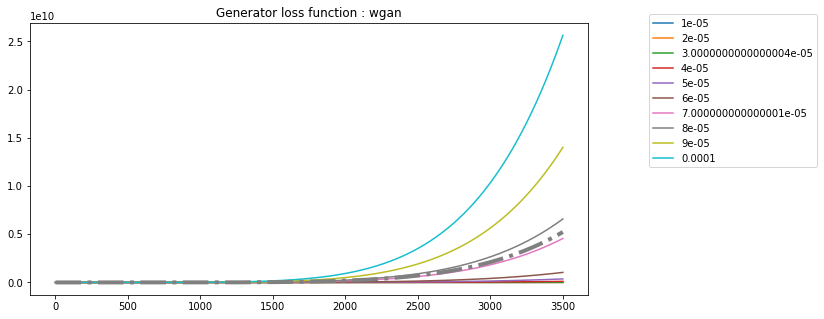

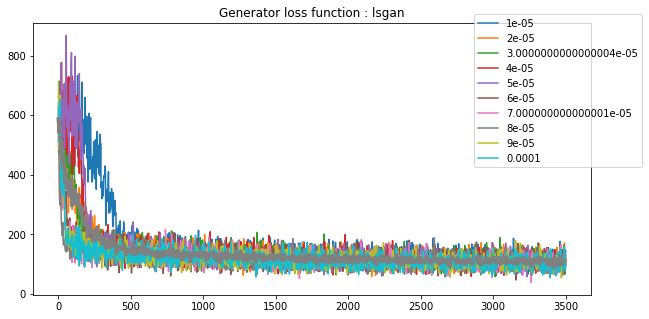

In [9]:
toplot(wgan,learning,"Generator loss function : wgan",1)
toplot(lsgan,learning,"Generator loss function : lsgan",1)

In [94]:
%matplotlib inline

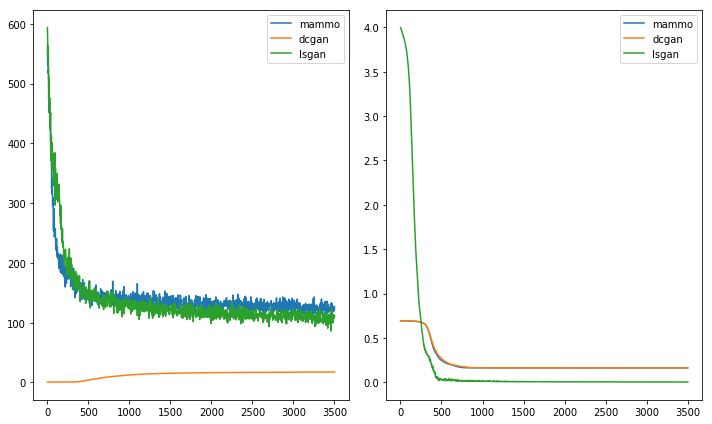

In [45]:
sel = 1
fig,(ax,ax2) = plt.subplots(1,2,figsize = (10,6))
for data in [mammo,dcgan,lsgan]:
    ax.plot(data[0,sel,:,0],np.mean(data[:,sel,:,1],axis=0))

ax.legend(["mammo","dcgan","lsgan"])
sel = 0
for data in [mammo,dcgan,lsgan]:
    ax2.plot(data[0,sel,:,0],np.mean(data[:,sel,:,1],axis=0))
    
ax2.legend(["mammo","dcgan","lsgan"])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [54]:
viridis = plt.cm.get_cmap('viridis', 10)
viridis.colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.281412, 0.155834, 0.469201, 1.      ],
       [0.244972, 0.287675, 0.53726 , 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ],
       [0.147607, 0.511733, 0.557049, 1.      ],
       [0.119699, 0.61849 , 0.536347, 1.      ],
       [0.20803 , 0.718701, 0.472873, 1.      ],
       [0.430983, 0.808473, 0.346476, 1.      ],
       [0.709898, 0.868751, 0.169257, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

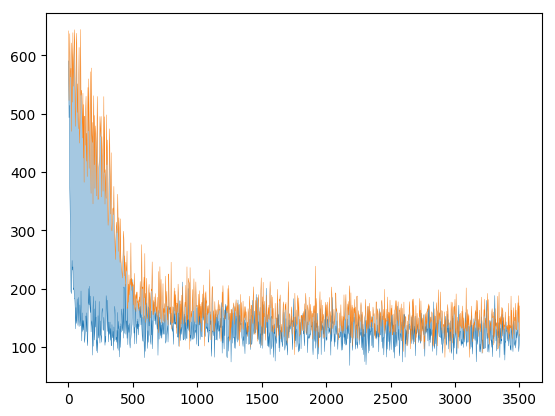

In [111]:
data = mammo
plt.figure()
plt.plot(data[0,1,:,0],data[-1,1,:,1],linewidth=0.3)
plt.plot(data[0,1,:,0],data[0,1,:,1],linewidth=0.3)
plt.fill_between(data[0,1,:,0],data[0,1,:,1],data[-1,1,:,1],alpha = 0.4)
plt.show()

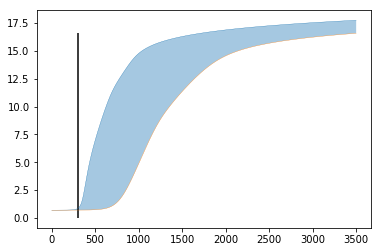

In [20]:
data = dcgan
plt.figure()
plt.plot(data[0,1,:,0],data[-1,1,:,1],linewidth=0.3)
plt.plot(data[0,1,:,0],data[0,1,:,1],linewidth=0.3)
plt.fill_between(data[0,1,:,0],data[0,1,:,1],data[-1,1,:,1],alpha = 0.4)
plt.vlines(300,0,np.max(data[0,1,:,1]))
plt.show()

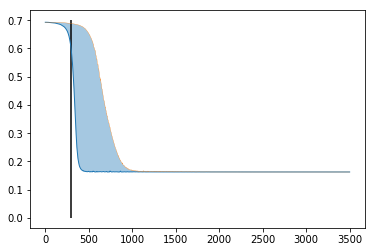

In [17]:
data = dcgan
sel = 0
plt.figure()
plt.fill_between(data[0,sel,:,0],data[0,sel,:,1],data[-1,sel,:,1],alpha = 0.4)
plt.plot(data[0,sel,:,0],data[-1,sel,:,1],linewidth=1)
plt.plot(data[0,sel,:,0],data[0,sel,:,1],linewidth=0.3)
#it 300 there is not image
plt.vlines(300,0,0.7)
plt.show()

In [ ]:
#analyze wgan

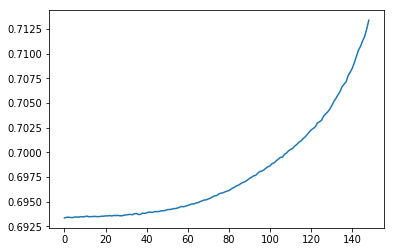

In [27]:
v = data[0,1,:,0] < 450
plt.plot(data[0,1,:,1][v])

# #when the output become black?


In [1]:

def get_slope(time_vector):
    return (((np.max(time_vector)-np.min(time_vector))/(len(time_vector))))

In [60]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [37]:
%matplotlib inline

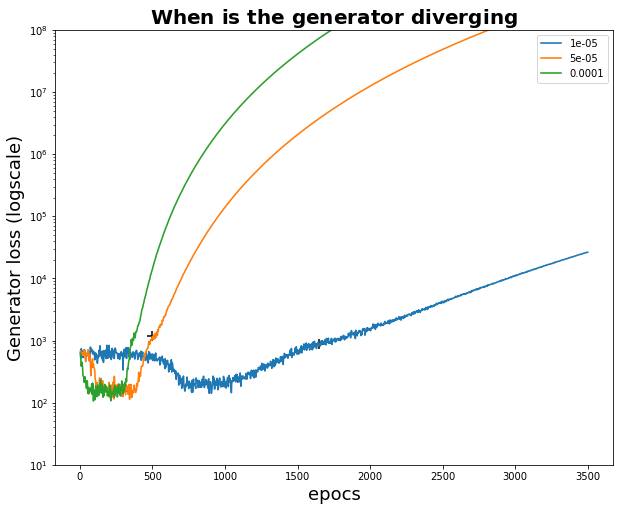

In [55]:
### id = [0,4,7]
lr = [1e-5,5e-5,1e-4]
index = [1650,500,300]

plt.figure(figsize = (10,8))
data = wgan
sel = 1
##generator
slope = get_slope(data[0,sel,:,0])

for c,i in enumerate(id):
    #epoc to index in vector
    lim = int(index[c]//slope)
    plt.plot(data[i,sel,:,0],data[i,sel,:,1],linewidth=1.6, label = lr[c]) 
    #plt.plot(data[i,sel,lim:,0],data[i,sel,lim:,1],linewidth=2,alpha = 0.8)
    plt.scatter(index[c],data[i,sel,lim,1],s=95, color = "black",marker = "+")

if sel:
    plt.yscale("log")
    plt.ylim([1e1,10e7])
plt.title('$\\bf{When\ is\ the\ generator\ diverging}$',
         fontsize=20)
plt.xlabel("epocs",fontsize=18)
plt.ylabel("Generator loss (logscale)",fontsize=18)
plt.legend()
plt.show()

#add annotation and image for each point de divergence ?

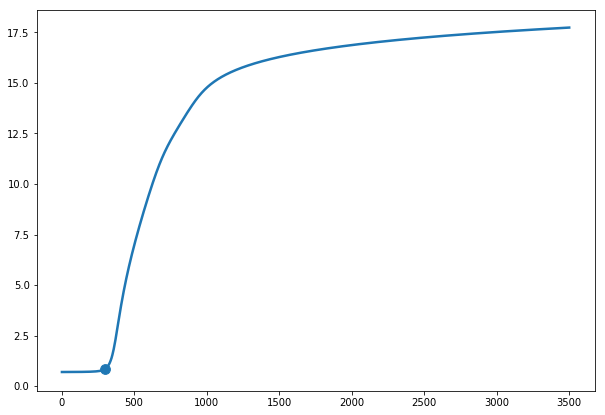

In [8]:
plt.figure(figsize = (10,7))
data = dcgan
sel = 1
##generator
slope = get_slope(data[0,sel,:,0])

lim = int(300/slope)
plt.plot(data[-1,sel,:,0],data[-1,sel,:,1],linewidth=2.5) 
plt.scatter(300,data[-1,sel,lim,1],s=95)

# experiment 3

In [7]:
mammo = np.load('results/mammo.npz')['loss']
lsgan = np.load('results/lsgan.npz')['loss']
wgan = np.load('results/wgan.npz')['loss']

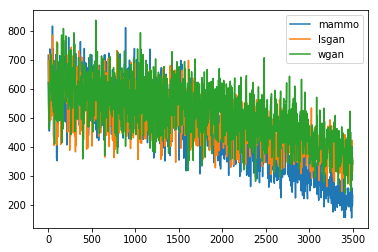

In [12]:
data = wgan
sel = 1

plt.plot(mammo[0,sel,:,0],mammo[0,sel,:,1],label="mammo")
plt.plot(lsgan[0,sel,:,0],lsgan[0,sel,:,1],label = "lsgan")
plt.plot(wgan[0,sel,:,0],wgan[0,sel,:,1],label="wgan")
plt.legend()


In [2]:
wgan = np.load('results/wgan.npz')['loss']

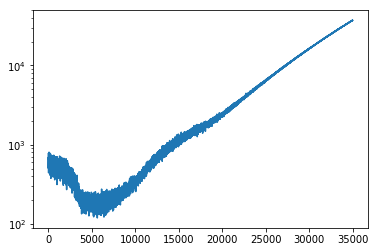

In [5]:
#35k epocs
sel = 1
plt.plot(wgan[0,sel,:,0],wgan[0,sel,:,1],label="wgan")
plt.yscale('log')

In [6]:
mammo = np.load('results/mammo.npz')['loss']
lsgan = np.load('results/lsgan.npz')['loss']

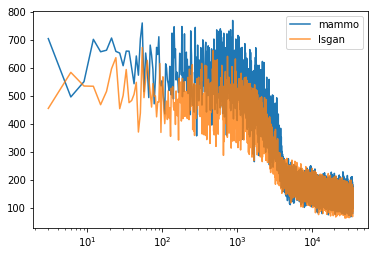

In [10]:
plt.plot(mammo[0,sel,:,0],mammo[0,sel,:,1],label="mammo")
plt.plot(lsgan[0,sel,:,0],lsgan[0,sel,:,1],label = "lsgan",alpha=0.8)
plt.xscale('log')
plt.legend()
